# Why Quantum Computers

El problema de algunos  tiempos exponenciales.


hese intractable
An intractable problem is one which can be solved in theory, but requires too many resources in practice.

 problems can be too difficult for even the largest supercomputers.

But if we can find algorithms that grow more efficiently, these intractable problems may suddenly become manageable, even with relatively slow or unreliable computers. This is where quantum computing comes in.



Mostrar el tiempo computacional que tarda

Physicists created quantum physics to explain behaviour they'd never seen before, and computer scientists found they could (in theory) exploit this newly discovered behaviour to create more efficient algorithms. As a result, there are certain problems that we believe are intractable for conventional computers, but are manageable for a ‘quantum’ computer that can exploit this behaviour. One such problem is integer factorisation.


Say we have an integer we'll call ''. A factorizing algorithm finds the integers  and  such that . This is sometimes easy; you can tell at a glance that , but if  is the product of two large prime numbers, this problem becomes very difficult. When we talk about integer factorisation, we’re going to assume the most difficult (worst-case) scenario. In the code cell below, we’re assigning a 250-digit number to the variable x:

In [53]:
x = 214032465024074496

In [54]:
p = 6413528947707158027
q = 3337202759497815655

p*q == x  # Evaluates to 'True'

False

. In fact, much of the internet’s encryption relies on the assumption that this problem is intractable, and that factoring a 617-digit RSA
RSA numbers are numbers taken from the RSA factoring challenge. These numbers are intentionally chosen to be difficult to factor.

'RSA' are the initials of three of the people that invented the protocol that uses these large numbers to encrypt information.

 number is impossible. In contrast, we know of efficient factoring algorithms for quantum computers that, once we have big enough quantum computers, we estimate could factorise these numbers in under a day.

At a very simple level, there are two factors that limit the size of problems our quantum computers can solve. The first is the amount of data they can store and work on, which we usually measure in qubits
A 'qubit' is a 'quantum bit'. We will study these later in this course.

. If we don’t have enough qubits, we simply can’t store and operate on problems above a certain size. The second is the error rate of our quantum computer; since we only see quantum behaviour in delicate laboratory experiments, creating quantum computers is a delicate process. The quantum computers we have right now are noisy, which means they often get things wrong and introduce ‘noise
Noise is useless information that's difficult to distinguish from useful information. For example, it's hard to hear someone talking to you if there are lots of other people talking loudly nearby.

’ into our results. Too much noise and our results will be nonsense!

In [55]:
from qiskit import *
import qiskit.visualization as viz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

In [56]:
backend = Aer.get_backend('statevector_simulator')

In [57]:
def getBloch(quantumC):
    backend = Aer.get_backend('statevector_simulator')
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [58]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [59]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(circ, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [60]:

from qiskit import QuantumCircuit
from qiskit.providers.ibmq import IBMQ, least_busy
from qiskit import transpile
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram


In [61]:
# 1. Create a simple quantum program called a 'quantum circuit'.
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, [1, 2])
qc.measure_all()

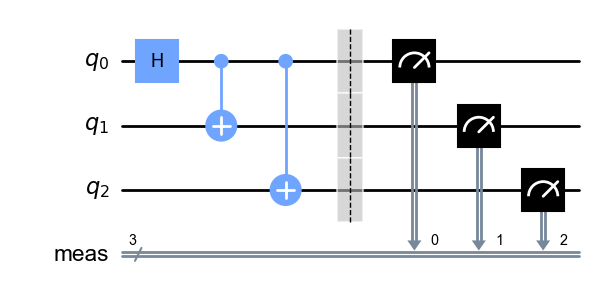

In [62]:
qc.draw(output='mpl')

In [63]:
# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
#    If you're running this example locally, you need to load your
#    account with your IBM Quantum API token
IBMQ.save_account(token="619248dfb30b84dca4f9b12db01b4ccb90d829794d41669210f0bb8e662bf192eaffe1bfeda0bac1a32e4f499a980703541ccb3217b0d6e323b0f14c426a62e1")
IBMQ.load_account()



configrc.store_credentials:WARNING:2022-10-23 20:07:19,505: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-23 20:07:19,918: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [64]:
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')


Running on ibm_oslo


In [65]:
# 3. Convert the program to a form the device can run.
#    This is known as 'transpiling'
transpiled_qc = transpile(qc, device)



In [66]:
# 4. Send the program off to IBM Quantum to run on a real device
#    and monitor its status.

job = device.run(transpiled_qc)
job_monitor(job)



Job Status: job has successfully run


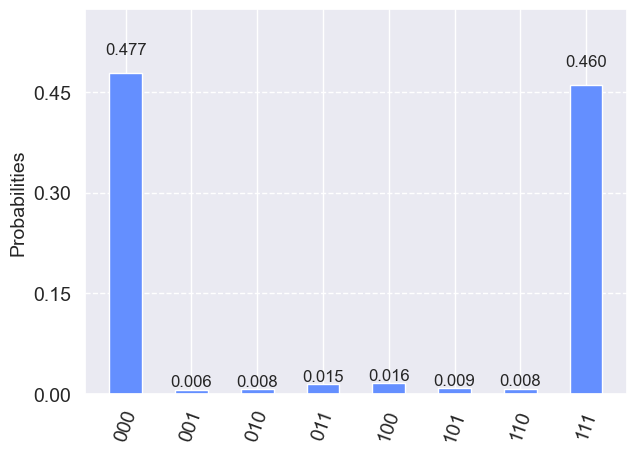

In [67]:
# 5. Plot the results as a histogram.

plot_histogram(job.result().get_counts())

Podemos crear circuitos como la representación que tendremos de circuitos clásicos, nos servirá para procesar nuestros qubits, se necesitan bits clásicos para almacenar la infromación que proviene de las mediciones de los qubits.

# Creando tu primer Circuito.



In [68]:
from qiskit.providers.aer import AerSimulator

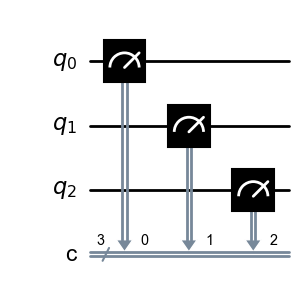

In [69]:
qc = QuantumCircuit(3,3)
#qc.h(0)
#qc.cx(0,1)
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')

In [70]:
sim = AerSimulator()
sim

AerSimulator('aer_simulator')

In [71]:
job =  sim.run(qc) # Corro el experimento
result = job.result()


In [72]:
result.get_counts()

{'000': 1024}

The keys in counts dictionary are bit-strings, and the values are the number of times that bit-string was measured. Quantum computers can have randomness in their results, so it's common to repeat the circuit a few times. This circuit was repeated 1024 times, which is the default number of times to repeat a circuit in Qiskit. By convention, qubits always start in the state 0, and since we are doing nothing to them before measurement, the results are always 0.

## Encode Inputs

Now let's look at how to encode a different binary string as an input. For this, we need what is known as a NOT gate. This is the most basic operation that you can do in a computer. It simply flips the bit value: 0 becomes 1 and 1 becomes 0. For qubits, we use a gate known as the X-gate for this.

Below, we’ll create a new circuit dedicated to the job of encoding:

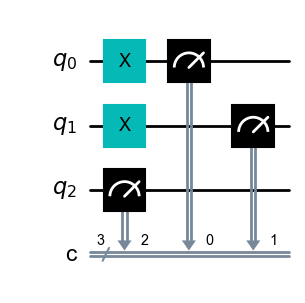

In [73]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')    # returns a drawing of the circuit

In [74]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

El número $011$ en binario representa el 3. ¿Como representaríamos el número 5, 8, 12?

Crear una función que:

1, Reciba un input y determine cual es su representación en binario, 
2. Basados en esa representación, y el largo de ese string, que cree un ricrcuito con mismo número de qubits y clasicos|
3. 

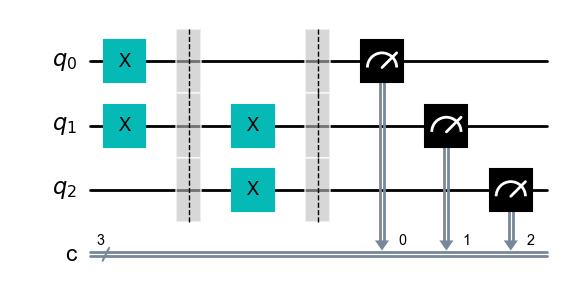

In [75]:

qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.barrier()
qc.x([1,2])
qc.barrier()
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')

    

In [76]:
# El número 5 en binario.
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()


{'101': 1024}

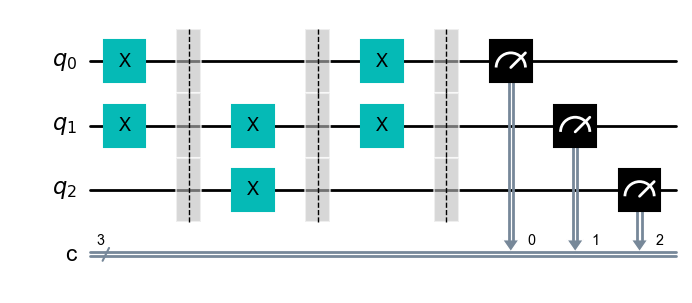

In [77]:
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # Perform X-gates on qubits 0 & 1
qc.barrier()
qc.x([1,2])
qc.barrier()
qc.x([0,1])
qc.barrier()
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')


In [78]:
# El número 6 en binario.
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()

{'110': 1024}

# Creating an adder circuit